update the content of the book

# 1. Describe the data
- It has 215 observations.
- There are 101 variables:
    - Fat content
    - 100-channel absorbance spectrum

# 2. Load packages and data

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import faraway.utils

In [2]:
import faraway.datasets.meatspec
meatspec = faraway.datasets.meatspec.load()
meatspec.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [35]:
meatspec.describe().round(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
count,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
mean,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,...,3.2,3.2,3.1,3.1,3.1,3.1,3.1,3.0,3.0,18.1
std,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,12.7
min,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,...,2.3,2.3,2.3,2.3,2.3,2.2,2.2,2.2,2.2,0.9
25%,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.8,2.8,2.7,2.7,2.7,2.7,2.7,2.6,2.6,7.3
50%,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,...,3.1,3.1,3.0,3.0,3.0,3.0,3.0,2.9,2.9,14.0
75%,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.1,3.1,...,3.5,3.5,3.5,3.4,3.4,3.4,3.4,3.4,3.4,28.0
max,4.2,4.2,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,...,5.1,5.1,5.1,5.1,5.1,5.0,5.0,5.0,5.0,49.1


# 3. Linear Regression
- To truly assess a model’s performance, we must test it on new data. Therefore, we’ll split the data into two parts: a training sample of the first 172 observations to build the models, and a test sample of the remaining 43 observations to evaluate them. The test sample will only be used for evaluation, not model selection.

In [3]:
trainmeat = meatspec.iloc[:172,]
testmeat = meatspec.iloc[173:,]

- Starting with a linear model using all predictors is a good approach. We use the LinearRegression function from the linear_model module in scikit-learn. While it has fewer features than statsmodels, it integrates well with other scikit-learn functions, making it more convenient. The function’s score is the R$^2$ value.

In [4]:
from sklearn import linear_model
fullreg = linear_model.LinearRegression(fit_intercept=True)
Xtrain = trainmeat.drop('fat', axis=1)
fullreg.fit(Xtrain, trainmeat.fat)
fullreg.score(Xtrain, trainmeat.fat)

0.9970196035963668

- The model's fit is very good in terms of R$^2$. To evaluate its predictive performance on the test sample, we use root mean square error (RMSE):
$$ \sqrt{ \sum_{i=1}^n {(\hat{y}_i - y_i)}^2 / n } $$
- We prefer RMSE over MSE because RMSE is in the same units as the response variable, making it easier to interpret.

In [5]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(fullreg.predict(Xtrain),trainmeat.fat))

0.6903167162215154

In [6]:
Xtest = testmeat.drop('fat', axis=1)
np.sqrt(mean_squared_error(fullreg.predict(Xtest), testmeat.fat))

3.8590675572315982

- The test sample performance is much worse, which is common.
- The model’s fit to the training data often overestimates its future performance. Here, the actual error is about five times higher than the model suggests.
- Not all 100 predictors are likely necessary for a good prediction. Let's examine the predictors:

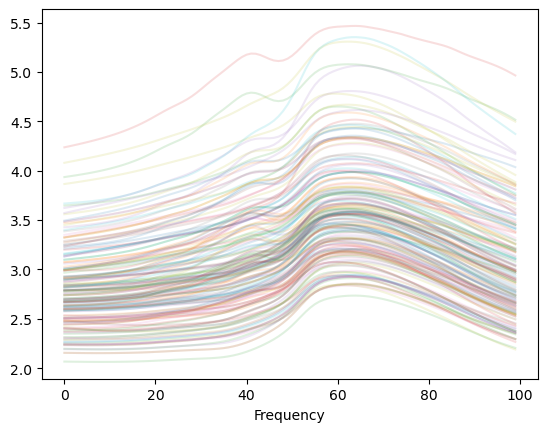

In [7]:
# Step 1: Create a frequency array
# 'frequency = np.arange(0, 100)' generates an array of values from 0 to 99.
# This array represents the 'Frequency' that will be plotted on the x-axis.
frequency = np.arange(0,100)

# Step 2: Plot the transposed training data
# 'Xtrain' is a training dataset (e.g., features or predictors).
# 'plt.plot(frequency, Xtrain.T)' plots each row of the transposed data against the 'frequency' array.
# 'alpha=0.15' sets the transparency of the lines to make the plot less dense when many lines overlap.
plt.plot(frequency, Xtrain.T, alpha=0.15); plt.xlabel("Frequency");

- Adjacent frequencies are highly correlated, suggesting many may be unnecessary. We use recursive feature elimination with cross-validation to select the number of predictors.

# 4. Recursive Feature Elimination
- We apply RFECV with cross-validation to find the best feature subset.
- `RFECV()` has parameters:
    - `redreg` is the linear regression model used for fitting.
    - `step=1` means one feature is removed at each step.
    - `cv=10` means 10-fold cross-validation is run to evaluate the model's performance.
- `selector.support_` is a boolean array that indicates which features have been selected.

In [11]:
from sklearn.feature_selection import RFECV 
redreg = linear_model.LinearRegression(fit_intercept=True) 
selector = RFECV(redreg, step=1, cv=10) 
selector = selector.fit(Xtrain, trainmeat.fat) 
Xred = Xtrain.iloc[:, selector.support_]
Xred.shape

(172, 19)

In [9]:
# RMSE on the train set
redreg.fit(Xred, trainmeat.fat)
np.sqrt(mean_squared_error(redreg.predict(Xred), trainmeat.fat))

2.7454516486909584

In [10]:
# RMSE on the test set
Xredtest = Xtest.iloc[:,selector.support_]
np.sqrt(mean_squared_error(redreg.predict(Xredtest),testmeat.fat))

2.5191785408096026

- The model selection removed 81 variables. While the nominal fit slightly worsened, the actual performance improved from 3.86 to 2.52.

# 5. Principal Components Analysis
- PCA can be understood as a particular rotation of the data. We want to rotate the data around its mean value. To this end, we center the matrix of predictors X by subtracting the mean for each variable so that the columns of X have mean zero. We use an X that does not include a column of ones for an intercept term. The PC decomposition can be computed intuitively as follows:
    - Find $u_1$ such that

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xtrain)
np.sqrt(pca.explained_variance_).round(2)[:10]

array([5.06, 0.51, 0.28, 0.17, 0.04, 0.02, 0.01, 0.01, 0.  , 0.  ])

- `pca.explained_variance_` contains the variance of each PC with their scores.
- The first principal component (PC) explains about ten times more variation than the second, with contributions dropping sharply thereafter. This indicates that most of the variation in the predictors can be captured with just a few dimensions.
- We use attribut `components_` of the PCA fitted object to show the linear combinations (or loadings).
- We plot these vectors against the frequency using.

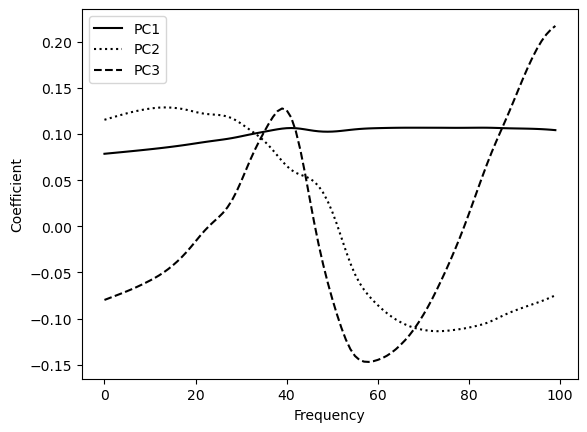

In [13]:
plt.plot(frequency, pca.components_[0,:],'k-', label="PC1")
plt.plot(frequency, pca.components_[1,:],'k:', label="PC2")
plt.plot(frequency, pca.components_[2,:],'k--', label="PC3")
plt.legend(); plt.xlabel("Frequency"); plt.ylabel("Coefficient");

- These vectors represent the linear combinations of predictors that generate the PCs:
    - The first PC is an almost constant combination of frequencies, measuring whether predictors are generally large or small.
    - The second PC contrasts higher and lower frequencies.
    - The third PC is harder to interpret.
- Sometimes, as in this example, PCs can be intuitively interpreted, but other times, we must be content with improved prediction without clear interpretation.
- We use the first four PCs to predict the response.
- `pca.fit_transform(Xtrain)` fit PCA to `Xtrain` to get PCs. Then it transforms `Xtrain` into score matrix.

In [17]:
pca = PCA()
pcscores = pca.fit_transform(Xtrain)
# Set and fit linear regression with the first four score columns
pc4 = pcscores[:,:4]
pc4reg = linear_model.LinearRegression(fit_intercept=True)
pc4reg.fit(pc4, trainmeat.fat)
# RMSE on train set
np.sqrt(mean_squared_error(pc4reg.predict(pc4), trainmeat.fat))

4.064745214417257

- Although we don’t expect as good a fit with only four variables compared to 100, the fit is still comparable to much larger models.
- PCR is a type of shrinkage estimation. To understand the term, let’s plot the 100 slope coefficients from the full least squares fit:

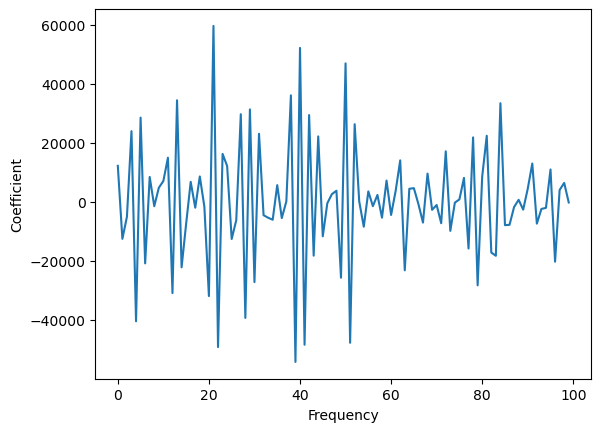

In [18]:
# Plot the coefficients of the original regression with full 100 features
plt.plot(frequency, fullreg.coef_)
plt.xlabel("Frequency"); plt.ylabel("Coefficient");

- The coefficients range in the thousands, and adjacent coefficients can differ significantly. This is surprising, as one might expect adjacent frequencies to have similar effects on the response.
- We plot the coefficients from the four-component model.
    - We calculate the effects of the original features by PCs loading and regression coefficients.
    - `pca.components_[:4,]` is the matrix of size of 100 x 4. They are loadings of the first four PCs.
    - `pca.components_[:4,] %*% pc4reg.coef_` is the effects of original features.

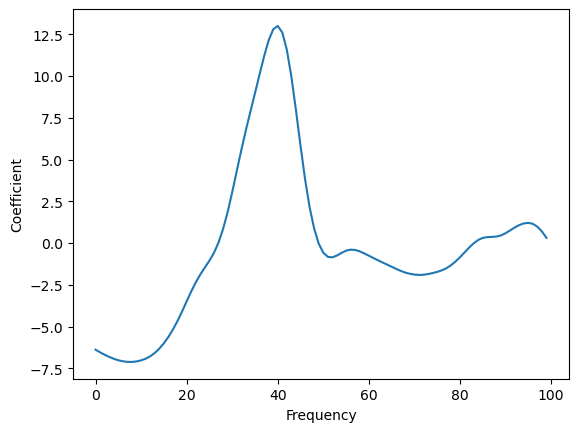

In [19]:
pceff = np.dot(pca.components_[:4,].T, pc4reg.coef_)
plt.plot(frequency, pceff)
plt.xlabel("Frequency"); plt.ylabel("Coefficient");

- The range of these coefficients is much smaller than the thousands seen in the ordinary least squares fit, resulting in more stable coefficients. This effect is known as shrinkage.
- Additionally, there is smoothness between adjacent frequencies, aligning with the scientific understanding of the data. The prediction mainly uses the lower half of the frequencies.
- Why use four PCs instead of another number? The standard advice is to choose the number of PCs where the standard deviations (SDs) of the PCs become relatively small. For example, the SDs of the PCs are 5.06, 0.51, 0.28, 0.17, 0.04, etc. While we could argue for using just the first PC, there’s a noticeable “elbow” at five, suggesting four PCs is a good choice.
- Let's evaluate the test sample predictions.
    - First, center the test predictors using the mean from the training set. `Xtest - pca.mean_` is 42 x 100.
    - Then, apply the formula $Z = XU$ to compute the prediction scores. `pca.components_[:4,].T` is 100 x 4. Then `rotX` ($Z$) is 42 x 4.

In [21]:
# Rotate the test data into the principal component space
rotX = (Xtest - pca.mean_) @ pca.components_[:4,].T
# RMSE on the test data
np.sqrt(mean_squared_error(pc4reg.predict(rotX), testmeat.fat))

4.525868196924931

- It is not impressively good.
- We can improve by using more principal components (PCs)
- We plot RMSE:

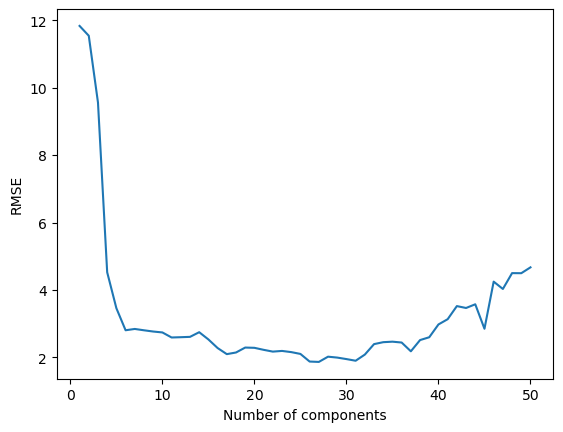

In [22]:
maxcomp = 50
ncomp = np.arange(1, maxcomp + 1) # 1,..., 50
rmsep = np.empty(maxcomp) # Empty array of 50 elements to store rmse
pcrmod = linear_model.LinearRegression(fit_intercept=True)
for icomp in ncomp: # icomp starts from 1 to 50
    # Fit regrssion of number of icomp PCs
    pcsi = pcscores[:, :icomp] # pcsi is 100 x icomp
    pcrmod.fit(pcsi, trainmeat.fat)    
    # Predict on the test data
    rotX = (Xtest - pca.mean_) @ pca.components_[:icomp,].T
    # rotX is 42 x icomp
    predictions = pcrmod.predict(rotX)
    # RMSE on test set for icomp regression
    rmsep[icomp - 1] = np.sqrt(mean_squared_error(predictions, testmeat.fat))
# Plot RMSE as a function of the number of principal components
plt.plot(ncomp, rmsep)
plt.ylabel("RMSE"); plt.xlabel("Number of components");

In [23]:
# Best choice of number of components
print(f'The number of PCs is {np.argmin(rmsep)+1} having the RMSE {min(rmsep)}')

The number of PCs is 27 having the RMSE 1.8687299927603425


- The best result occurs with 27 PCs, significantly improving the RMSE. However, this is unrealistic since we wouldn’t have access to the test sample in advance.
- We could reserve part of our training data for model selection, but this reduces the quality of our estimation and raises questions about the size of the new test sample.
- Cross-validation (CV) solves this by dividing the data into ( m ) parts. Each part is used as a test set while the rest serve as the training set. We evaluate the RMSE for each part and average the results.
    - The cross_val_predict function from the model_selection module is useful for performing cross-validation (CV). By default, it randomly divides the data into ten parts, making the outcome non-deterministic. We set the random seed using np.random.seed(123) to ensure reproducibility.

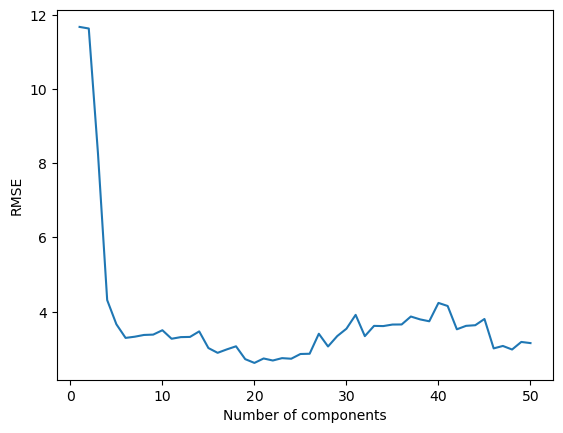

In [25]:
from sklearn.model_selection import cross_val_predict
np.random.seed(123)
# empty 50 array to store RMSE
rmsepcv = np.empty(50)
pcrmod = linear_model.LinearRegression(fit_intercept=True)
for i in ncomp:
    pcsi = pcscores[:, :i] # pcsi is 100 x i
    pcrmod.fit(pcsi, trainmeat.fat)    
    # Predict with cross validation
    ypred = cross_val_predict(pcrmod, pcsi, trainmeat.fat, cv=10)
    # ypred is 100 x 1
    # RMSE on train set with cross validated predicts
    rmsepcv[i - 1] = np.sqrt(mean_squared_error(ypred, trainmeat.fat))
plt.plot(ncomp, rmsepcv)
plt.ylabel("RMSE"); plt.xlabel("Number of components");

In [26]:
# Best choice
print(f'The number of PCs is {np.argmin(rmsepcv)+1} having the RMSE {min(rmsepcv)}')

The number of PCs is 20 having the RMSE 2.613641343905644


- The minimum occurs at 20 components.
- We can find the RMSE on the test set from our previous calculation with:

In [ ]:
rmsep[np.argmin(rmsepcv)]

- Using this method, we achieve an RMSE of 2.29 on the test sample.
- In contrast, the “cheating” approach, which uses the test sample to determine the optimal number of PCs (27), results in an RMSE of 1.869.
- However, with cross-validation, we select 20 PCs and achieve an RMSE of 2.29, which is our best legitimate result so far.

# 6. Partial Least Squares
- Partial least squares (PLS) is a technique used to relate a set of input variables $X_1, \ldots, X_m$ to a set of output variables $Y_1, \ldots, Y_z$. PLS regression is similar to PCR in that both methods predict responses using linear combinations of the predictors. However, the key difference is that while PCR determines these combinations without considering the output variables $Y$, PLS regression explicitly selects them to optimize the prediction of $Y$.
- We will focus on univariate PLS, where z = 1 and Y is a scalar. We will seek models of the form:
$$ \hat{y} = β_1 T_1 + \cdots + β_k T_k $$
- where $T_i's$ are  mutually orthogonal linear combinations of the Xs.
- Several algorithms exist for computing PLS, typically by iteratively determining the $T_i's$  to predict y while maintaining orthogonality. A common criticism is that PLS lacks a well-defined modeling problem, making it hard to differentiate between algorithms theoretically. Garthwaite (1994) offers an intuitive algorithm, while de Jong (1993) describes the well-known SIMPLS method.
- Let’s fit a PLS model with four components using the PLSRegression function from scikit-learn.
- We do not scale the predictors because they are almost in same variance.

In [38]:
from sklearn.cross_decomposition import PLSRegression
plsmod = PLSRegression(scale=False, n_components=4).fit(Xtrain, trainmeat.fat)

- PLS extracts 4 latent components.
- `plsmod.coef_` gives regression coefficients linking the original `Xtrain` variables to the target variable `trainmeat.fat`. It is 100 x 1.
- `plsmod.x_loadings_` shows how each original X variable contributes to each of the latent components. It is 100 x 4.
- `plsmod.y_loadings_` show how the Y variable is related to each of the latent components. It is 1 x 4.
- `plsmod.x_scores_` represent the original X variables transformed into the new space defined by the latent components. It is 172 x 4.
    - These scores are used to maximize the covariance between the projections of X and Y during the PLS regression process.
    - They capture the essential information in X that is most relevant for predicting Y.
    - The `x_scores_` can be used to interpret how the original X variables relate to the latent components.
    - They can also be used for further analysis, such as plotting the scores to visualize the separation of samples based on the latent components.
- `plsmod.y_scores_` represent the Y variable transformed into the new space defined by the latent components extracted during the PLS regression process. It is 172 x 4.
    - These scores are used to maximize the covariance between the projections of X and Y during the PLS regression process.
    - They capture the most relevant information in Y that is related to the latent structure of X.
- We plot the loadings.

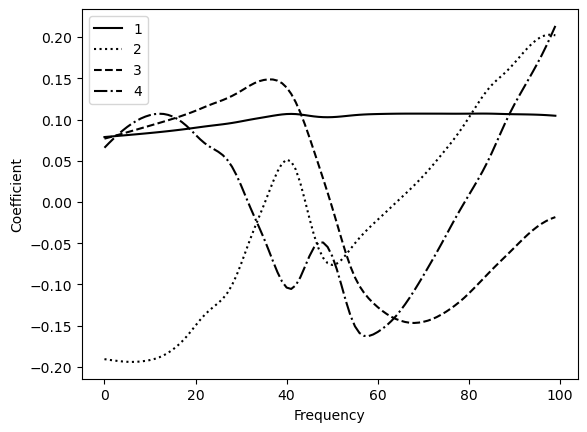

In [45]:
# Plot the loadings of the first component
plt.plot(frequency, plsmod.x_loadings_[:,0], 'k-', label="1")
# Plot the loadings of the second component
plt.plot(frequency, plsmod.x_loadings_[:,1], 'k:', label="2")
plt.plot(frequency, plsmod.x_loadings_[:,2], 'k--', label="3")
plt.plot(frequency, plsmod.x_loadings_[:,3], 'k-.', label="4")
plt.legend(); plt.xlabel("Frequency"); plt.ylabel("Coefficient");

- We can represent the fitted values as $ \hat{y} = X\hat{\beta} $, where $ \hat{\beta} $ is the overall linear combination of the predictors used in this four-component model, as shown in the following plot:

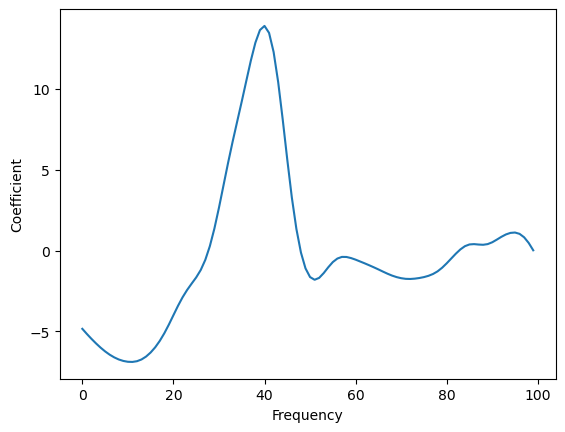

In [82]:
plt.plot(frequency, plsmod.coef_.flatten())
plt.xlabel("Frequency"); plt.ylabel("Coefficient");

- The combination is similar to PCA's but not identical.
- We can evaluate this model’s prediction accuracy on the training sample with:

In [ ]:
np.sqrt(mean_squared_error(plsmod.predict(Xtrain),trainmeat.fat))

- The prediction performance is slightly better than the four-component PCA regression model, which is expected since PLS regression is designed to model the response.
- We might achieve better results with more than four components. To test this, we’ll use ten-fold cross-validation on the training sample:

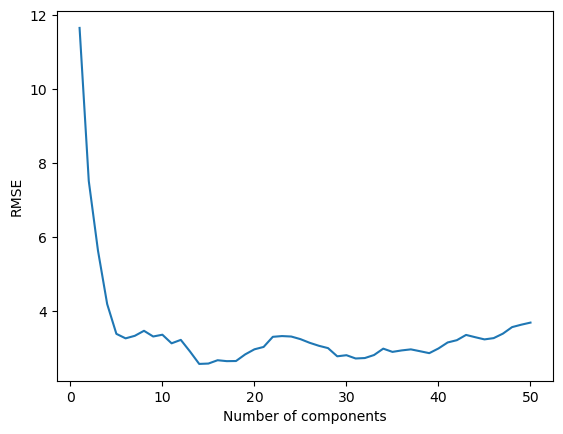

In [83]:
np.random.seed(123)
ncomp = 50
rmsep = np.empty(ncomp)
component = np.arange(1, ncomp)
for i in range(ncomp):
    pls = PLSRegression(scale=False, n_components=i+1)
    ypred = cross_val_predict(pls, Xtrain, trainmeat.fat, cv=10)
    rmsep[i] = np.sqrt(mean_squared_error(ypred, trainmeat.fat))
# Plot RMSEP against the number of components
plt.plot(range(1, ncomp+1), rmsep)
plt.ylabel("RMSE"); plt.xlabel("Number of components");

In [84]:
# Finding the minimizing number of components
np.argmin(rmsep)+1

14

In [85]:
# Implement PLS with 14 components
plsbest = PLSRegression(scale=False, n_components=14)
plsbest.fit(Xtrain, trainmeat.fat)
ypred = plsbest.predict(Xtrain)
# RMSE on train set
np.sqrt(mean_squared_error(ypred, trainmeat.fat))

1.9527955858500425

In [86]:
# RMSE on test set
np.sqrt(mean_squared_error(plsbest.predict(Xtest), testmeat.fat))

2.025096432074445

- We have outperformed PCA regression while using fewer linear combinations.
- We haven’t performed any diagnostic checks in this analysis. Since PLS and PCR are as sensitive to assumptions as OLS, it’s essential to include these checks in a comprehensive analysis.
- PCR and PLS are especially useful when the number of predictors (p) is large relative to the sample size (n). They can even handle cases where ( p > n ), which is common in fields like bioinformatics, where data often includes many genes for a small number of individuals.
- PLS is often better for prediction problems because it constructs linear combinations specifically to predict the response. Conversely, PCR is more suited for developing insights through interpretable linear combinations.
- Although both methods use dimension reduction, they typically don’t reduce the number of variables since every predictor contributes to the linear combinations.
- If you aim to reduce the cost of measuring predictors for a more affordable yet effective prediction model, consider criterion-based variable selection or the lasso method.

# 7. Ridge Regression
- Ridge regression assumes that normalized regression coefficients should not be very large, which is reasonable when you have many predictors with potential effects on the response.
- This method includes shrinkage and is particularly effective when the model matrix is collinear, making least squares estimates unstable.
- Assuming the predictors are centered by their means, scaled by their standard deviations, and the response is centered, the ridge regression estimate minimizes:
$$ (y - X β)^T (y - X β) + α \sum_j β_j^2 $$
- for some choice of $α \geq 0 $. The penalty term is $\sum_j β_j^2$.
- We aim to keep this term small. Ridge regression is a type of penalized regression due to this term, also known as regularization.
- The ridge regression estimates of βs:
$$ \hat{β} = (X^T X + α I)^{-1} X^T y $$
- The term $\alpha I$ introduces a “ridge” in the $X^T X$ matrix, giving the method its name. An equivalent expression of the problem is choosing $\beta$ to minimize:
$$ (y - X β)^T (y - X β) \text{~subject to~} \sum_{j=1}^p β_j^2 \leq t^2 $$
- Here, t serves the same role as α. We find the least squares solution with an upper bound on the coefficient sizes. Ridge regression can also be justified from a Bayesian perspective, where a prior distribution favors smaller parameter values.
- The ridge solution is illustrated in the left panel of Figure 11.9. The OLS fit that minimizes the residual sum of squares $RSS$ is at $\hat{\beta}{LS}$. Confidence ellipses around $\hat{\beta}{LS}$ represent progressively less desirable solutions. These ellipses grow until they intersect with a circle of radius $t$ centered at the origin, satisfying $\sum_{j=1}^p \beta_j = t^2$. This intersection point is the best fitting solution under this constraint. If $\hat{\beta}_{LS}$ is inside the circle, the ridge and OLS solutions are identical, but this is rare as $t$ is usually small.
- While $α$ or $t$ can be chosen automatically, it’s also wise to plot $\hat{\beta}$ values against $α$. Select the smallest $α$ that yields stable $\beta$ estimates.
- We demonstrate the method on meat spectroscopy data. When $\alpha = 0$, it corresponds to least squares, and as $\alpha \to 0$, $\hat{\beta} \to 0$. In practice, we focus on a narrower range of $\alpha$. Here, we use a log-spaced grid of $\alpha$ values between $10^{-5}$ and $10^{-10}$. For other datasets, you may need to adjust this range to capture the relevant region.

In [102]:
n_alphas = 50
# Array of numbers spaced evenly from 10^-10 to 10^-5 on a log scale 
alphas = np.logspace(-10, -5, n_alphas)

In [100]:
li = []
li.append('abc')
li

['abc']

In [103]:
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(Xtrain, trainmeat.fat)
    coefs.append(ridge.coef_)

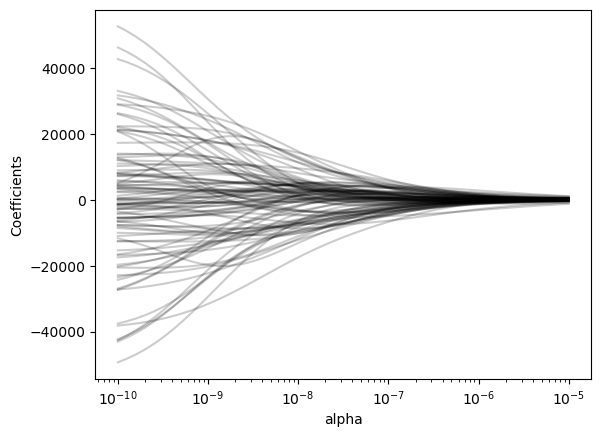

In [112]:
# We plot the coefficients against α
# plt.gca is get current axis
ax = plt.gca()
# Plot the coefficients for each alpha value
# 'k' specifies the color black, and alpha=0.2 sets the transparency
ax.plot(alphas, coefs, 'k', alpha=0.2)
# Set the x-axis to a logarithmic scale
ax.set_xscale('log')
# Reverse the x-axis limits
# ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha'); plt.ylabel('Coefficients');

- We can select the value of α using cross-validation by searching across a grid of α values:

In [115]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for alpha values
pars = {'alpha': np.logspace(-10, -5, 50)}
# - pars: dictionary with parameter grid
# - scoring='r2': use R^2 score to evaluate the models
# - cv=10: use 10-fold cross-validation
rr = GridSearchCV(linear_model.Ridge(), pars, scoring='r2', cv=10)
rr.fit(Xtrain, trainmeat.fat);

In [116]:
# Obtaining the best choice of α
bestalpha = rr.best_params_['alpha']; bestalpha

9.540954763499944e-07

In [117]:
# Fit a Ridge regression model with the best alpha
rrbest = linear_model.Ridge(alpha=bestalpha, fit_intercept=True)
rrbest.fit(Xtrain, trainmeat.fat)
predictions = rrbest.predict(Xtrain)
# RMSE on train set
np.sqrt(mean_squared_error(predictions, trainmeat.fat))

1.5614892626991872

In [118]:
# RMSE on test set
np.sqrt(mean_squared_error(rrbest.predict(Xtest),testmeat.fat))

2.029414351486119

- The result is better than PLS result.
- We plot the regression coefficients for this choice of α:

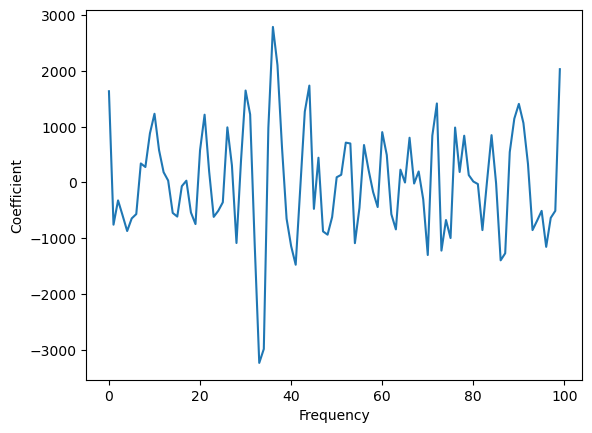

In [119]:
# Plot the corresponding coefficients of Ridge with best alpha
plt.plot(frequency, rrbest.coef_)
plt.xlabel("Frequency"); plt.ylabel("Coefficient");

- Compare these to the PCA regression coefficients.
- The ridge coefficients are less smooth than the four-component PCA, which is insufficient for good prediction.
- The optimal shrinkage is moderate, and the ridge coefficients are much smaller than those of the full linear model.
- Ridge regression coefficients are biased, which is undesirable but not the only factor. Mean-squared error (MSE) measures estimation accuracy and can be split into bias squared (systematic error) and variance (estimate variability):
$$ \mathbb{E}\left(\hat{\beta}-\beta\right)^2=\left(\mathbb{E}\left(\hat{\beta}-\beta\right)\right)^2+\mathbb{E}\left(\hat{\beta}-\mathbb{E}\left(\hat{\beta}\right)\right)^2 $$
    - Reducing estimate variance can increase bias, but this trade-off can significantly lower MSE, making some bias acceptable. This is a common issue in ridge regression.
- Frank and Friedman’s 1993 study found ridge regression outperformed PCR and PLS, but noted that the best method varies by dataset, making it hard to pick a clear winner.

# 8. Lasso
- The lasso method is similar to ridge regression, but it minimizes an equation with a different penalty term to select the optimal value for $\hat{β}$:
$$ \left({y}-{X\beta}\right)^\prime\left({y}-{X\beta}\right) \text{~subject to~} \sum_{j}^{p}\left|\beta_j\right|\le t $$
      or equivalent to minimize:
$$ \left({y}-{X\beta}\right)^\prime\left({y}-{X\beta}\right) + \alpha \sum_j \left|\beta_j\right| $$
- Introduced by Tibshirani in 1996, the lasso method lacks an explicit solution but can be efficiently solved using least angle regression, as described by Efron et al. in 2004. “Lasso” stands for “Least Angle Shrinkage and Selection Operator.”
- The key difference between lasso and ridge regression lies in their solutions. The lasso constraint $L_1$ $\sum_{j}^{p}|\beta_j| \le t$ forms a square in two dimensions and a polytope in higher dimensions, often resulting in some coefficients being zero. As $t$ increases, more variables are included, and their coefficients grow. For large $t$, the constraint becomes redundant, yielding the least squares solution.
- For moderate $t$ values, many $\hat{\beta}$ in lasso tend to be zero, making it ideal for sparse effects where only a few predictors matter. Lasso acts as a variable selection method by eliminating predictors with $\hat{\beta} = 0$. In contrast, ridge regression reduces $\hat{\beta}$ but doesn’t eliminate variables.

In [ ]:
# Create a Lasso regression model with the corrected max_iter parameter
lasso = linear_model.Lasso(max_iter=int(1e6), tol=0.001)

# Set the alpha parameter of the Lasso model
lasso.set_params(alpha=1e-9)

# Fit the Lasso model to the training data
lasso.fit(Xtrain, trainmeat.fat)

- The small value of a indicates very little shrinkage. We check the proportion of nonzero coefficients in this fit: 

In [ ]:
np.mean(abs(lasso.coef_)>1e-5)

- None of the lasso coefficients are zero. We check the performance on the training sample: 

In [ ]:
np.sqrt(mean_squared_error(lasso.predict(Xtrain),trainmeat.fat))

In [ ]:
# On test sample
np.sqrt(mean_squared_error(lasso.predict(Xtest),testmeat.fat))

- The results are worse than PCR, PLS, and ridge regression but still better than the full least squares model. Convergence issues could be addressed by scaling the data, though this requires additional effort to scale the test sample similarly. This example isn’t well-suited for lasso due to strong collinearity among predictors, which are mostly useful for predicting the response. Lasso excels with sparse effects, such as in gene expression data where few genes influence the outcome. It also works when the number of predictors exceeds the number of observations. However, lasso is less effective in applications with non-sparse effects, like many socioeconomic examples.
- In this example, measuring all frequencies likely incurs no extra cost. However, in applications where recording additional predictors is costly, lasso is especially valuable as an effective model selection method.

# 9. Other methods
- The scikit-learn package offers several shrinkage methods. Elastic-Net combines ridge and lasso by using both L1 and L2 penalties, allowing some predictors to be dropped while retaining ridge’s regularization benefits. Least Angle Regression (LARS) prefers models with fewer predictors, similar to lasso. Orthogonal Matching Pursuit goes further by specifying a maximum number of nonzero coefficients. The package also includes Bayesian regression, which imposes weakly informative priors, similar to ridge regression.
- Many methods can predict a continuous response from predictors, such as neural networks, support vector machines, and random forests. However, these methods don’t use a linear combination of predictors. While effective, they lack the interpretable model coefficients of linear methods, which clearly show how new predictions are generated as more data is collected.